<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/Faceclass(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/class/train',target_size=(300,300), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/class/vaditition',target_size=(300,300 ), batch_size=32, class_mode='categorical')
     


training_set.class_indices
test_set.class_indices

Found 617 images belonging to 11 classes.
Found 270 images belonging to 11 classes.


{'Binh': 0,
 'Dung': 1,
 'Hoang': 2,
 'Thao': 3,
 'Thinh': 4,
 'Thuan': 5,
 'Tien': 6,
 'Trong': 7,
 'thang': 8,
 'van': 9,
 'vuthach': 10}

In [2]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [3]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 10 , batch_size= 512 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/10
20/20 [==============================] - 216s 10s/step - loss: 2.2725 - accuracy: 0.3663
Epoch 2/10
20/20 [==============================] - 209s 10s/step - loss: 0.5979 - accuracy: 0.8169
Epoch 3/10
20/20 [==============================] - 205s 10s/step - loss: 0.2774 - accuracy: 0.9173
Epoch 4/10
20/20 [==============================] - 204s 10s/step - loss: 0.1885 - accuracy: 0.9417
Epoch 5/10
20/20 [==============================] - 211s 11s/step - loss: 0.1711 - accuracy: 0.9417
Epoch 6/10
20/20 [==============================] - 204s 10s/step - loss: 0.1205 - accuracy: 0.9676
Epoch 7/10
20/20 [==============================] - 203s 10s/step - loss: 0.0893 - accuracy: 0.9692
Epoch 8/10
20/20 [==============================] - 205s 10s/step - loss: 0.0848 - accuracy: 0.9676
Epoch 9/10
20/20 [==============================] - 204s 10s/step - loss: 0.0544 - accuracy: 0.9822
Epoch 10/10
20/20 [==============================] - 73s 4s/step - loss: 0.0277 - accuracy: 0.9854
đ

In [4]:
#Lưu
from keras.models import load_model
model.save("class.h5")
model_1=load_model('class.h5')

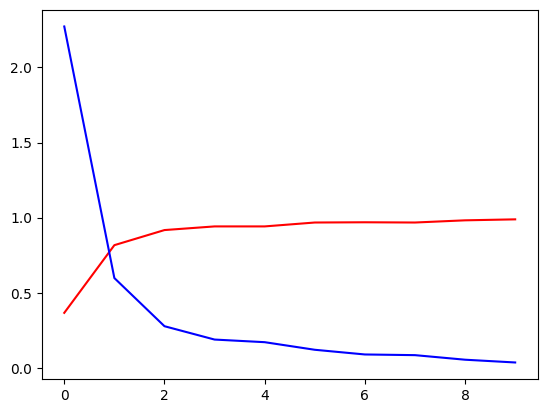

In [6]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']                                                           # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 269ms/step
Thuan


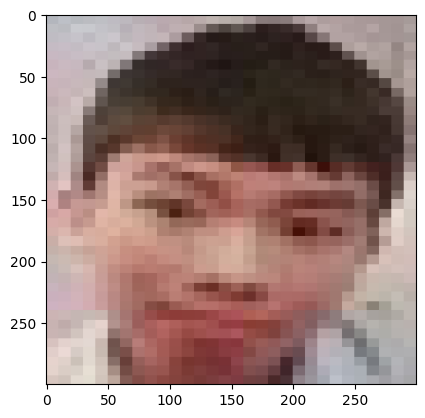

1/1 [==============================] - 0s 107ms/step
Thuan


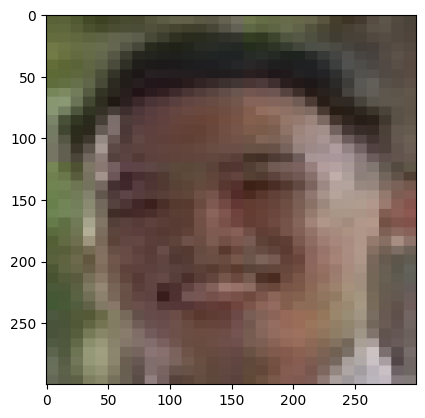

1/1 [==============================] - 0s 107ms/step
Thuan


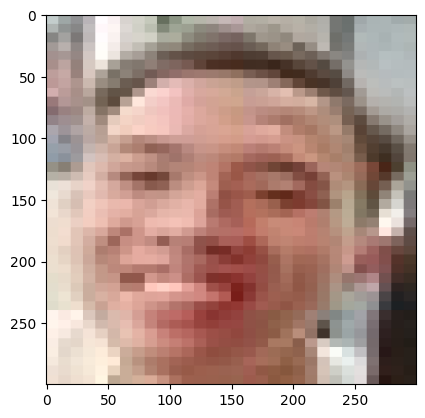

1/1 [==============================] - 0s 102ms/step
Thuan


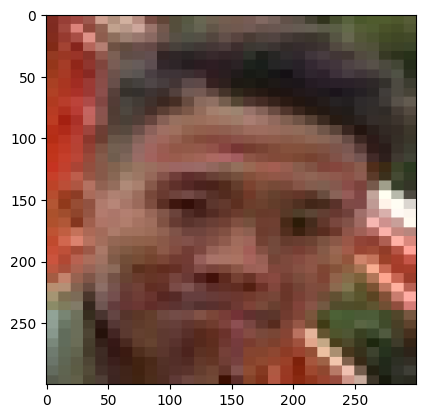

1/1 [==============================] - 0s 106ms/step
Thuan


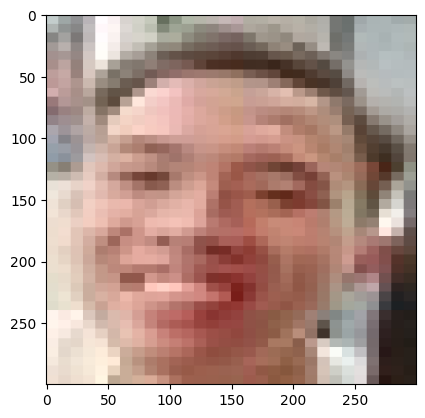

1/1 [==============================] - 0s 111ms/step
Tien


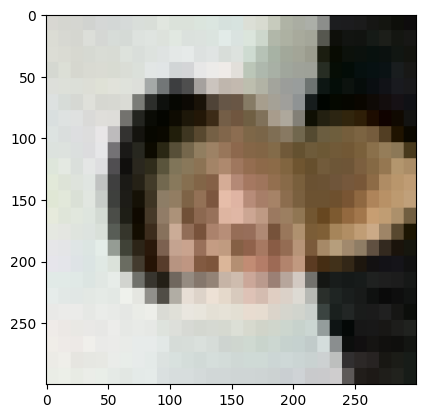

1/1 [==============================] - 0s 114ms/step
Tien


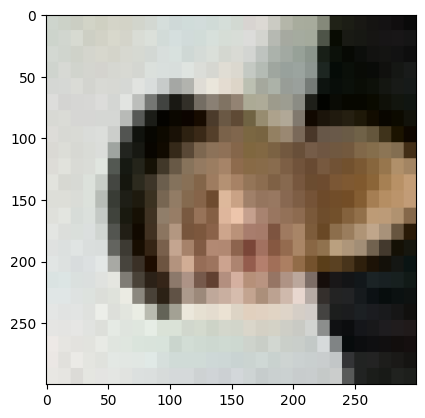

1/1 [==============================] - 0s 103ms/step
Tien


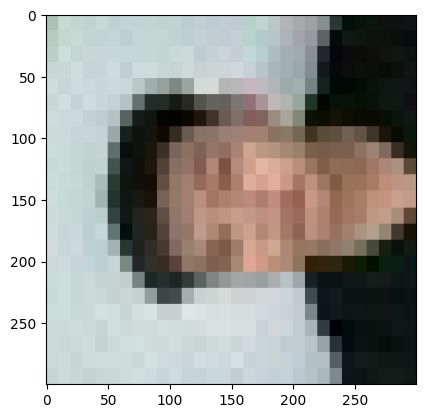

1/1 [==============================] - 0s 111ms/step
Tien


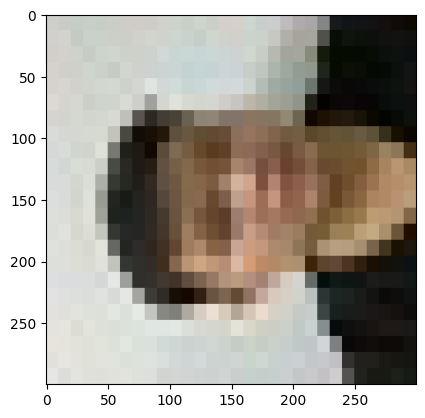

1/1 [==============================] - 0s 104ms/step
Tien


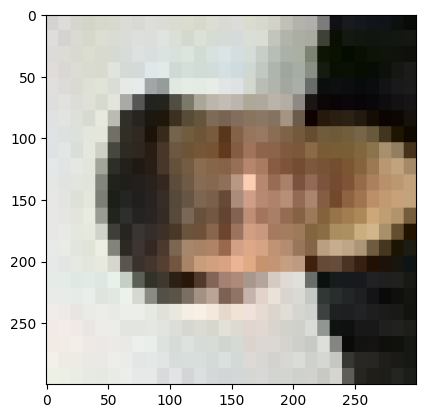

1/1 [==============================] - 0s 111ms/step
Tien


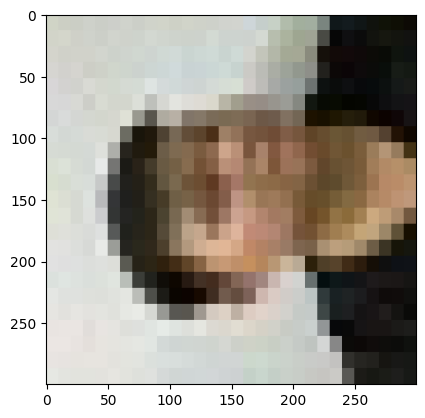

1/1 [==============================] - 0s 102ms/step
Thinh


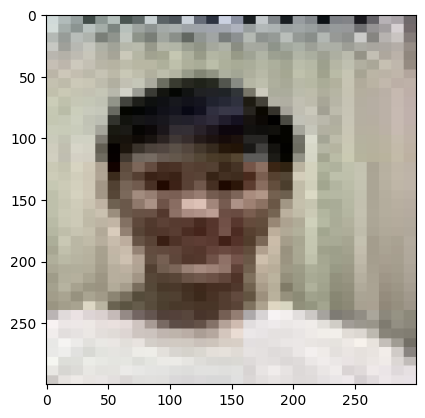

1/1 [==============================] - 0s 104ms/step
Thinh


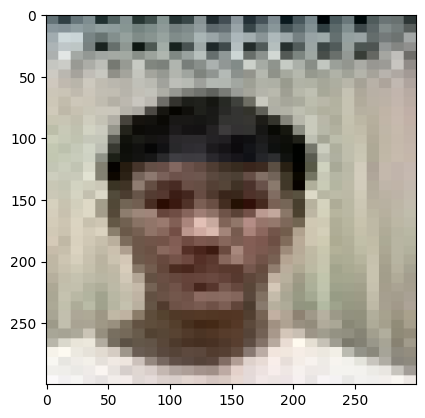

1/1 [==============================] - 0s 154ms/step
Thinh


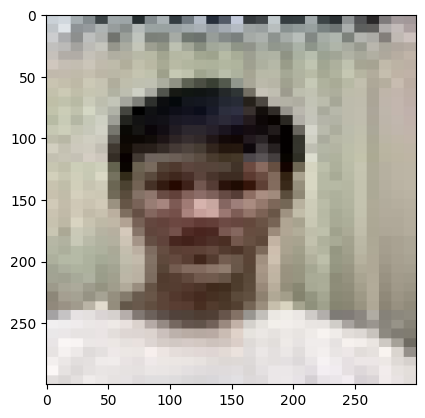

1/1 [==============================] - 0s 182ms/step
Thinh


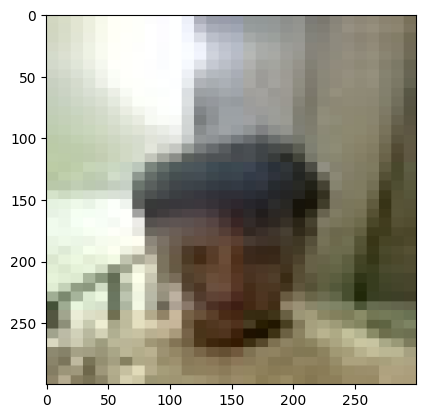

1/1 [==============================] - 0s 191ms/step
Thinh


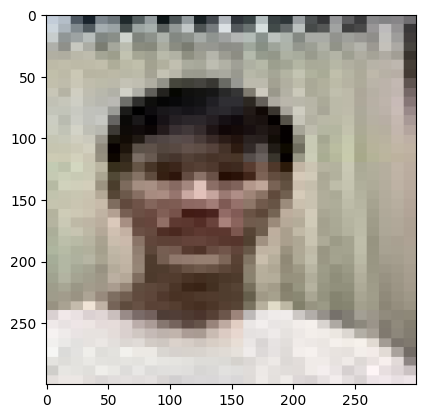

1/1 [==============================] - 0s 194ms/step
Thinh


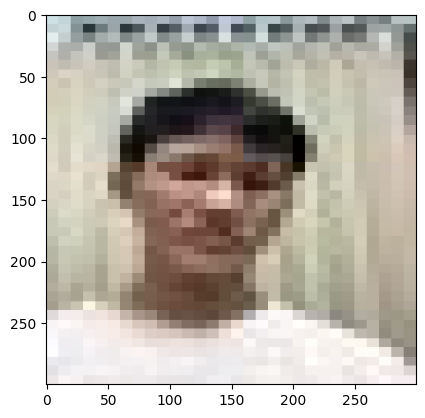

1/1 [==============================] - 0s 183ms/step
Binh


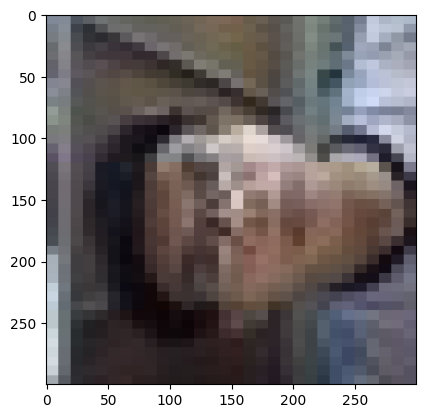

1/1 [==============================] - 0s 172ms/step
Binh


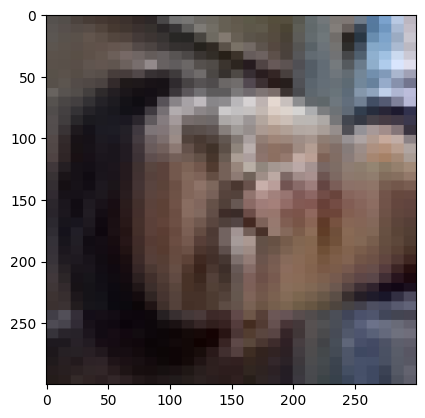

1/1 [==============================] - 0s 103ms/step
Binh


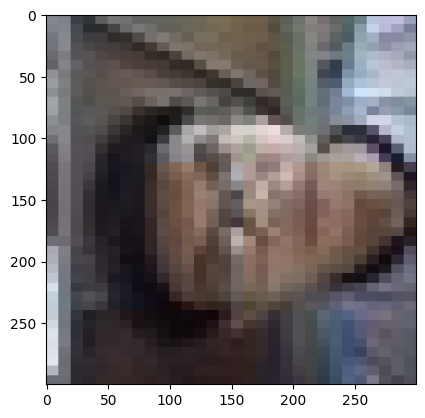

1/1 [==============================] - 0s 103ms/step
Binh


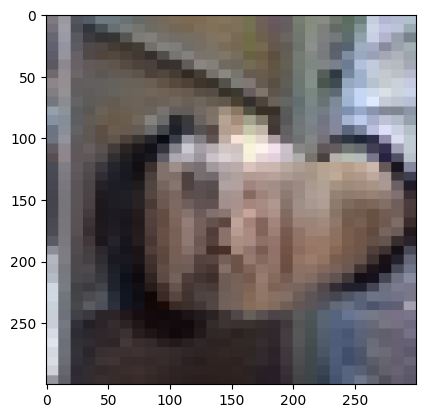

1/1 [==============================] - 0s 103ms/step
Dung


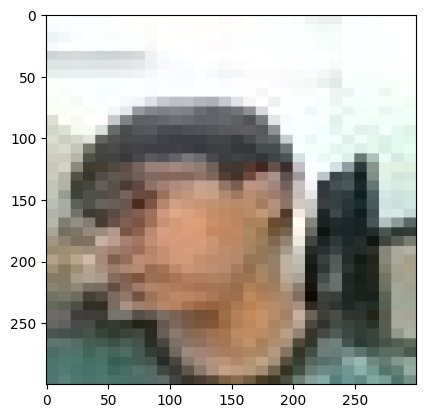

1/1 [==============================] - 0s 102ms/step
Dung


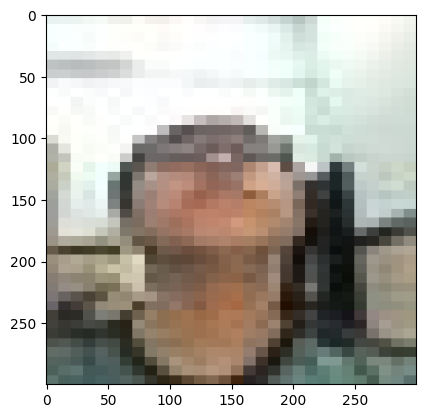

1/1 [==============================] - 0s 109ms/step
Dung


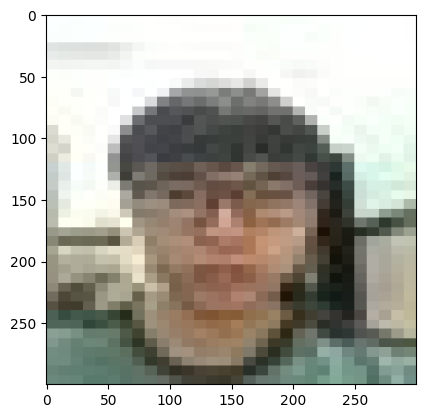

1/1 [==============================] - 0s 101ms/step
Hoang


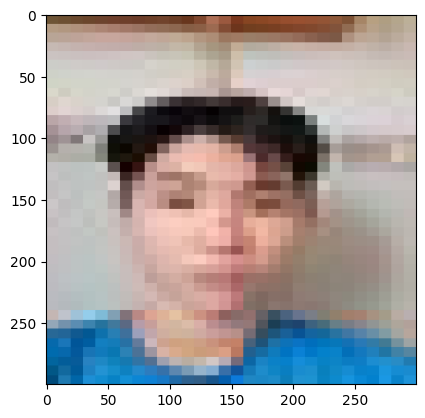

1/1 [==============================] - 0s 117ms/step
Hoang


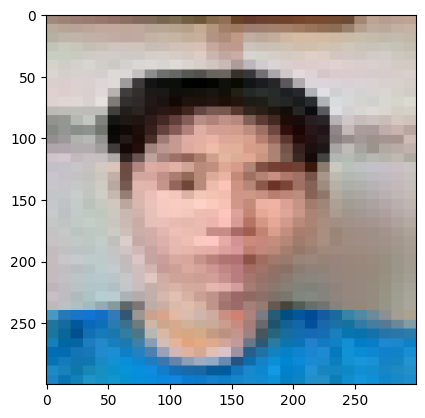

1/1 [==============================] - 0s 102ms/step
Hoang


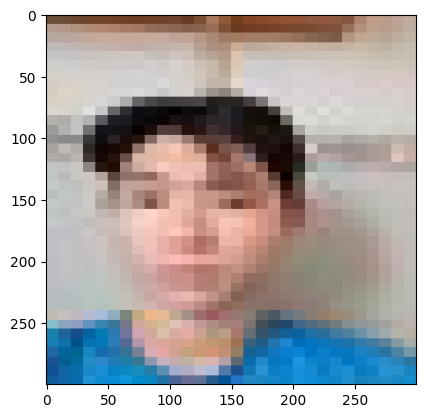

1/1 [==============================] - 0s 104ms/step
Hoang


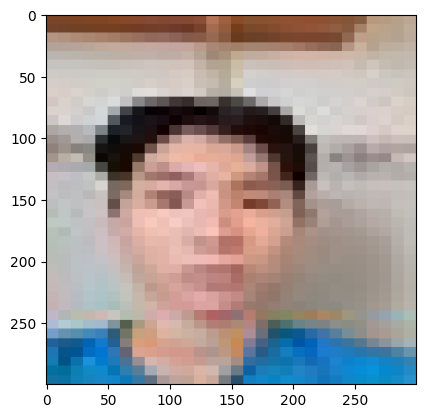

1/1 [==============================] - 0s 106ms/step
Trong


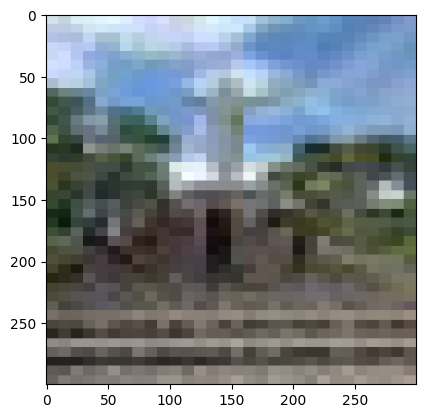

1/1 [==============================] - 0s 103ms/step
Trong


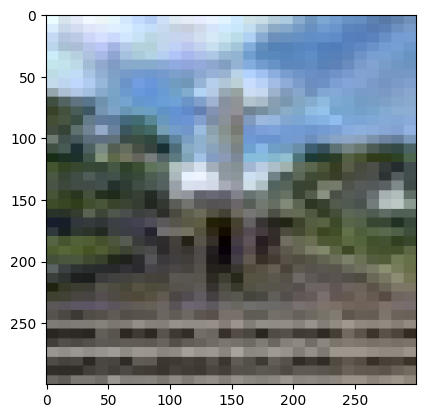

1/1 [==============================] - 0s 106ms/step
Trong


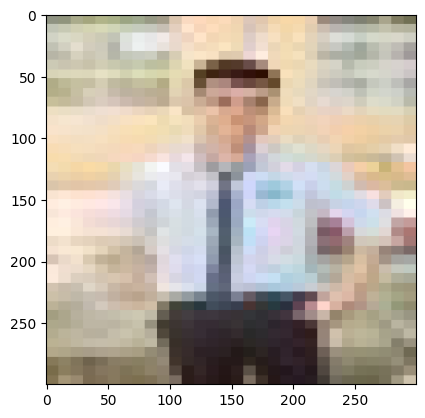

1/1 [==============================] - 0s 104ms/step
Trong


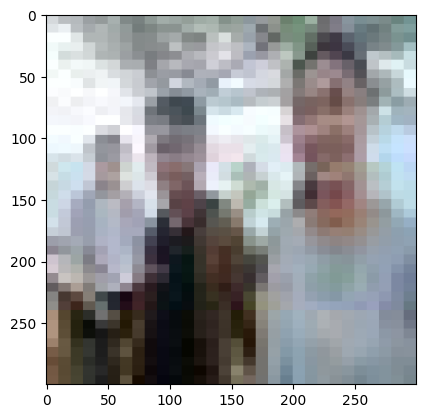

1/1 [==============================] - 0s 106ms/step
Trong


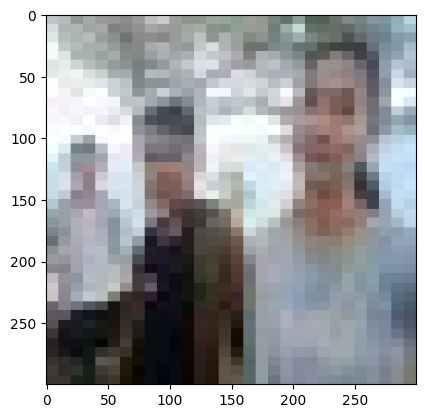

1/1 [==============================] - 0s 105ms/step
Trong


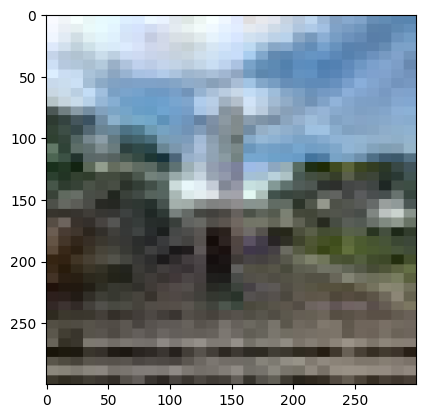

1/1 [==============================] - 0s 104ms/step
Thao


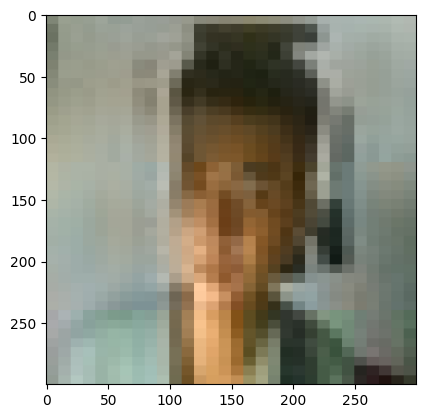

1/1 [==============================] - 0s 102ms/step
Thao


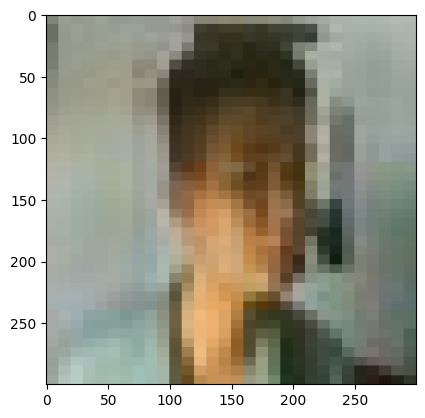

1/1 [==============================] - 0s 108ms/step
Thao


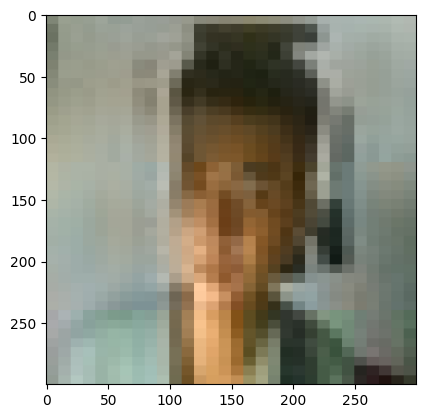

1/1 [==============================] - 0s 171ms/step
Thao


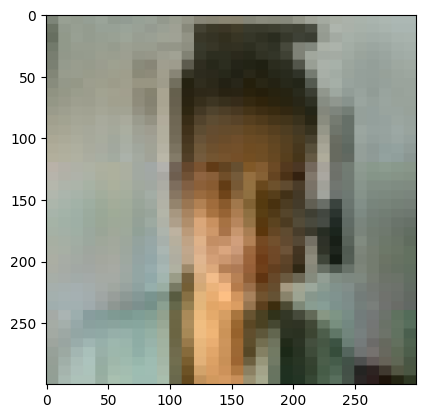

1/1 [==============================] - 0s 192ms/step
Thao


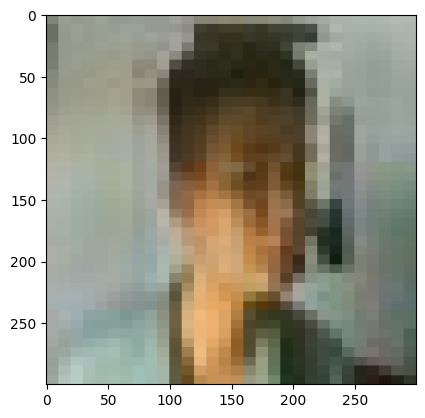

1/1 [==============================] - 0s 183ms/step
Thao


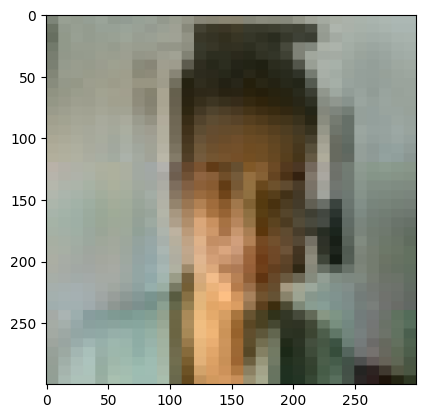

1/1 [==============================] - 0s 188ms/step
van


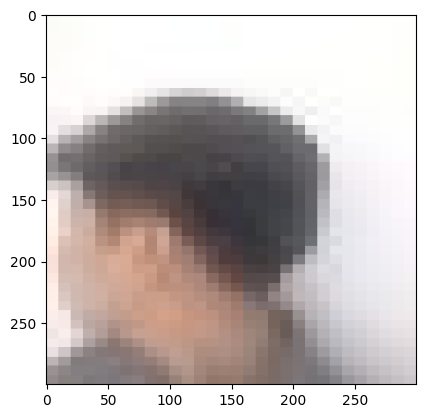

1/1 [==============================] - 0s 189ms/step
van


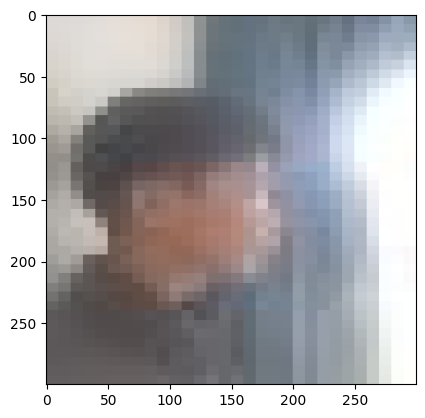

1/1 [==============================] - 0s 179ms/step
van


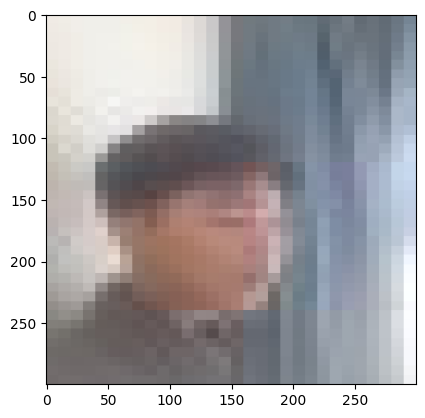

1/1 [==============================] - 0s 104ms/step
van


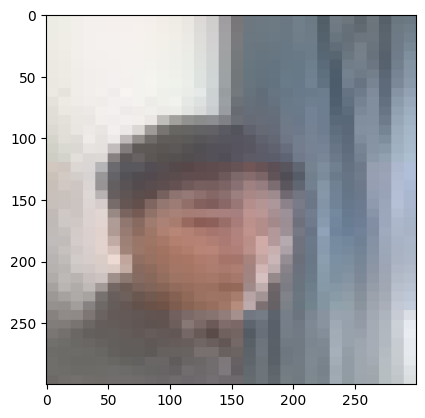

1/1 [==============================] - 0s 103ms/step
van


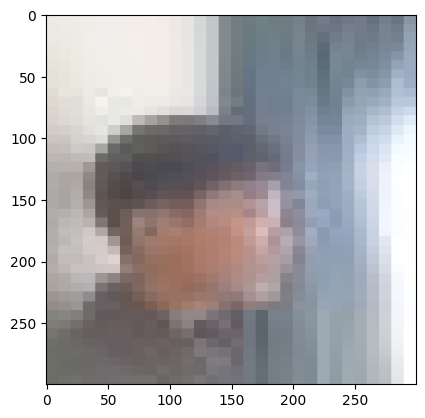

1/1 [==============================] - 0s 106ms/step
van


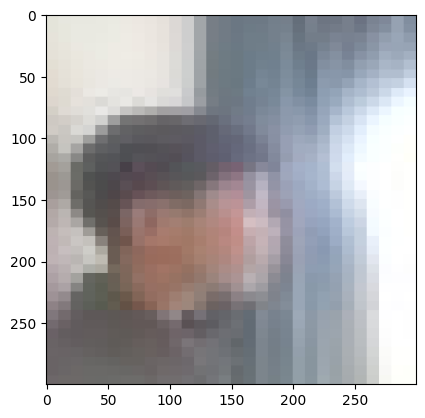

1/1 [==============================] - 0s 102ms/step
vuthach


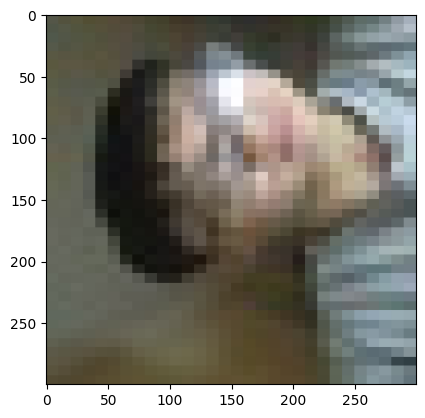

1/1 [==============================] - 0s 106ms/step
vuthach


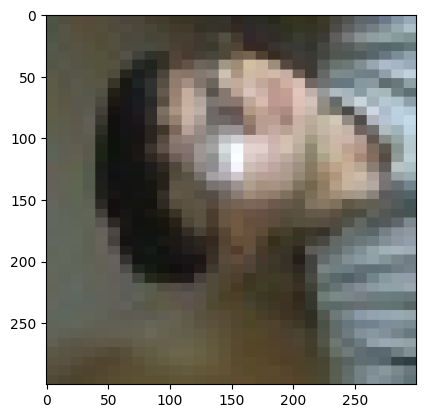

1/1 [==============================] - 0s 103ms/step
thang


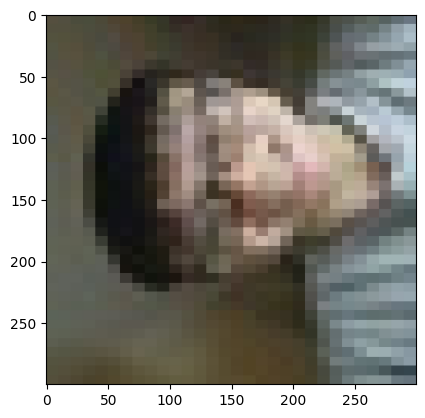

1/1 [==============================] - 0s 109ms/step
vuthach


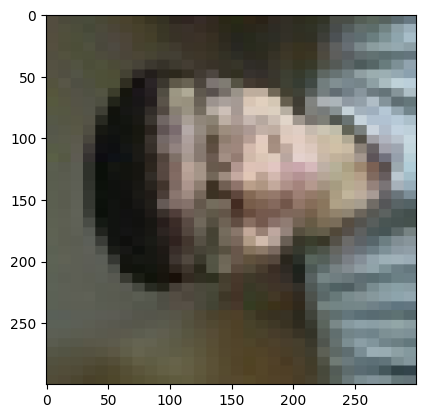

1/1 [==============================] - 0s 105ms/step
thang


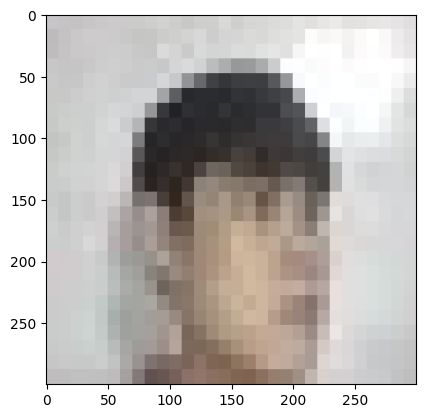

1/1 [==============================] - 0s 115ms/step
thang


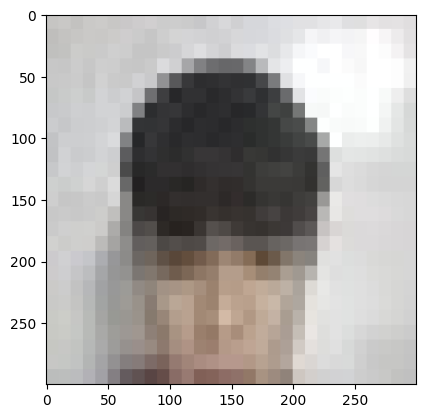

1/1 [==============================] - 0s 104ms/step
thang


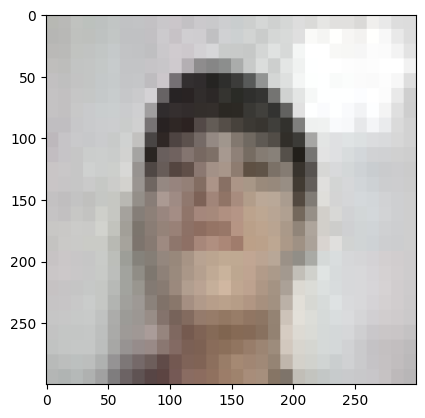

1/1 [==============================] - 0s 103ms/step
thang


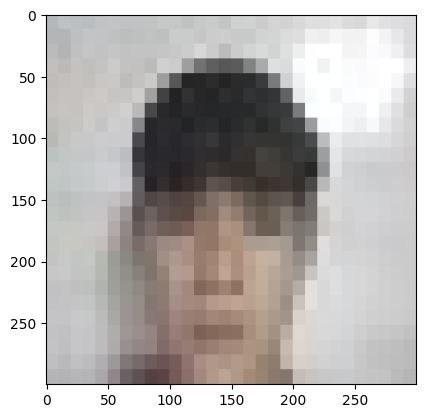

1/1 [==============================] - 0s 110ms/step
thang


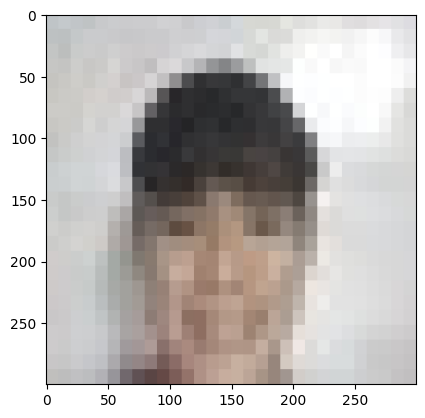

1/1 [==============================] - 0s 103ms/step
thang


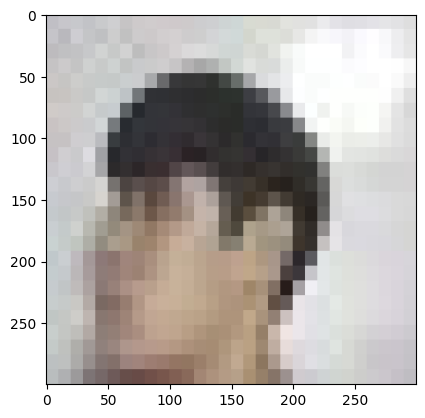

In [7]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/class/test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Binh','Dung','Hoang','Thao','Thinh', 'Thuan','Tien','Trong','thang','van','vuthach']
  print(class_name[result]) 
  plt.show()